## 線性迴歸(Linear Regression)
[參考網址](https://github.com/andy6804tw/2021-13th-ironman/tree/main/8.%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8)


#### 認識線性迴歸
線性迴歸是統計上在找多個自變數和依變數之間的關係所建出來的模型。只有一個自變數(x)和一個依變數(y)的情形稱為簡單線性迴歸，大於一個自變數(x1,x2,...)的情形稱為多元迴歸(Multiple regression)。\
迴歸分析的<font color=red>目標函數</font>或稱<font color=red>損失函數</font>(loss function)就是希望找到的模型最終的<font color=red>殘差越小越好</font>，來找參數 a 和 b。


#### 兩種求解方法
線性模型最常見的解法有兩種，分別為 Closed-form (閉式解) 與梯度下降 (Gradient descent)。當特徵少時使用 Closed-form 較為適合，使用下面公式來求出 θ 值。我們又可以說線性模型的最小平方法的解即為 Closed-form。\
$\qquad \theta = (X^TX)^{-1}X^Ty$\
\
若當是複雜的問題時 Gradient descen 較能解決，其原因是大部分的問題其實是沒有公式解的。我們只能求出一個函數 f(x) 使其誤差最小越好。

## Least Square Method (最小平方法)
尋找一條會使得預測(predict)值和真實值的差平方合的平均(MSE)最小的模型。


在一個二維空間中，我們可以找到無數條直線。現在我們能做的事情就是從這無數條直線中選出一條最佳的當作我們的預測模型，同時它面對這三點的誤差是要最小的。因此我們的目標就是要最小化 MSE 也就是所謂的損失函數 (loss function)。所以整個線性回歸的目標就是最小化我們的損失函數，其中一個解法就是最小平方法。因為 MSE 等於 1/n 倍的残差平方和 (RSS)，其中分母 n 為常數，不影響極小化故拿掉。因此最終的求解是滿足最小化平方和，使其最小化。


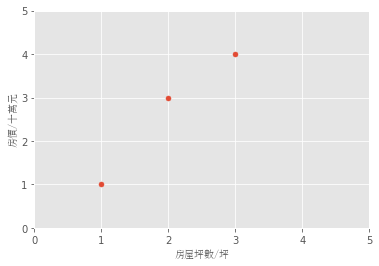

In [17]:
# imports
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 亂數產生資料
np.random.seed(0)
noise = np.random.rand(100, 1)
x = [1, 2 ,3]
y = [1, 3, 4]
# y=ax+b Target function  a=3, b=15


# plot
plt.scatter(x,y,s=25)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))

plt.xlabel('房屋坪數/坪', fontproperties="SimSun")
plt.ylabel('房價/十萬元', fontproperties="SimSun")
plt.show()

#### 手刻線性回歸
我們透過 Sklearn 所提供的房價預測資料集進行線性回歸模型建模，並採用最小平法。首先為了要驗證我們上面的公式，因此我們先利用 Numpy 套件自己手刻做一系列的矩陣運算求出每一項的係數與截距。

In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
boston_dataset = load_boston()
# 輸入特徵共13個
X = boston_dataset.data
# 設定截距項 b 權重值為 1 
b=np.ones((X.shape[0], 1))
# 添加常數項特徵，最終有 13+1 個輸入特徵
X=np.hstack((X, b))
# 輸出(房價)
y = boston_dataset.target

# 計算 Beta (@ 為 numpy 中 2-D arrays 的矩陣乘法)
Beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ Beta

print('MSE:', mean_squared_error(y_pred, y))
print("beta = %s" %Beta)

MSE: 21.894831181729206
beta = [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]


c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

## Sklearn LinearRegression 模型
線性回歸簡單來說，就是將複雜的資料數據，擬和至一條直線上，就能方便預測未來的資料。接下來我們一樣使用房價預測資料集，並使用 Sklearn 提供的 LinearRegression 來求解。

Parameters:
*   fit_intercept: 是否有截距，如果沒有則直線過原點。

Attributes:
*   coef_: 取得係數。
*   intercept_: 取得截距。

Methods:
*   fit: 放入X、y進行模型擬合。
*   predict: 預測並回傳預測類別。
*   score: R2 score 模型評估。

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
boston_dataset = load_boston()
# 輸入特徵共13個
X = boston_dataset.data
# 輸出(房價)
y = boston_dataset.target

# 訓練模型
linearModel = LinearRegression()
linearModel.fit(X, y)

y_pred = linearModel.predict(X)
print('MSE:', mean_squared_error(y_pred, y))

MSE: 21.894831181729206


c:\Users\bluesky\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [31]:
# 取得13個特徵係數
print("係數 : %s" %linearModel.coef_)
# 取得截距
print("截距 : %s" %linearModel.intercept_)

係數 : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
截距 : 36.45948838509001


#### 多項式的回歸模型 (PolynomialFeatures)
對於線性回歸來說，資料都是很均勻地分布在一條直線上，但現實的資料往往是非線性的分佈。如果我們一樣使用上述方法取得線性模型，在實際場域上預測效果可能並不大。

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.style.use('seaborn')

# make_pipeline是指可以將多個Sklearn的function一起執行
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

# 隨機定義新的x,y值
def make_data(N,err=1,rseed=42):
    rng=np.random.RandomState(rseed)
    x = rng.rand(N,1)**2
    y = 10-1/(x.ravel()+0.1)
    if err>0:
        y+=err*rng.randn(N)
    return x,y

X, y = make_data(100)

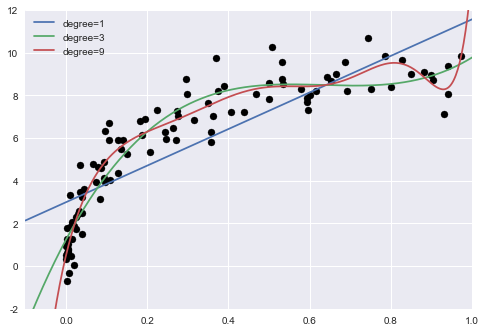

In [41]:
# 測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
# 繪製真實答案的分佈
plt.scatter(X.ravel(),y,color='black')

# 測試 1,3,7 的degree
for degree in [1,3,9]:
    y_test=PolynomialRegression(degree).fit(X,y).predict(x_test)
    plt.plot(x_test.ravel(),y_test,label='degree={}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')

In [43]:
x = np.array([[1.40280301e-01],[9.03857692e-01],[5.35815131e-01],[3.58391981e-01],[2.43418162e-02],[2.43342904e-02],[3.37370600e-03],[7.50261116e-01],[3.61339257e-01],[5.01366775e-01],[4.23721405e-04],[9.40725121e-01],[6.92960750e-01],[4.50878979e-02],[3.30603187e-02],[3.36372142e-02],[9.25633424e-02],[2.75369313e-01],[1.86576499e-01],[8.48144121e-02],[3.74363965e-01],[1.94585372e-02],[8.53484957e-02],[1.34221000e-01],[2.07999831e-01],[6.16501290e-01],[3.98696193e-02],[2.64437058e-01],[3.50955021e-01],[2.15764084e-03],[3.69110747e-01],[2.90784768e-02],[4.23170975e-03],[9.00383763e-01],[9.32445223e-01],[6.53506272e-01],[9.27895484e-02],[9.53984185e-03],[4.68174835e-01],[1.93734218e-01]])
y = np.array([ 5.82469676e+00,  7.94613194e+00,  9.24976070e+00,  6.59761731e+00,
        2.16651685e+00, -2.50365745e-03, -1.00182588e+00,  9.02075194e+00,
        8.57086436e+00,  8.50848958e+00, -7.34549241e-02,  8.73802779e+00,
        7.26038154e+00,  2.38778217e+00,  2.02397265e+00,  3.57417666e+00,
        5.15052189e+00,  5.57291682e+00,  6.83461431e+00,  4.20408429e+00,
        7.21499207e+00,  2.24057093e+00,  5.63575746e+00,  6.66180813e+00,
        5.91402744e+00,  8.29511673e+00,  3.18174801e+00,  8.23158707e+00,
        7.30330971e+00,  2.55480191e-02,  6.76197223e+00,  1.05656839e+00,
        1.21851645e+00,  1.03566236e+01,  8.95941549e+00,  9.67640393e+00,
        5.17463285e+00,  2.25781800e-01,  8.60137397e+00,  8.13359834e+00])

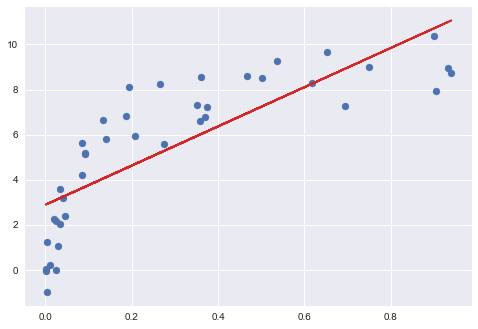

In [46]:
#簡單線性回歸
plt.style.use('seaborn')
model = LinearRegression()
model.fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x, yfit, color="#d62728")

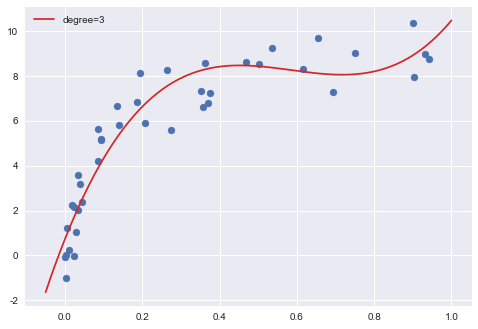

In [45]:
#測試資料集
x_test = np.linspace(-0.05,1,500)[:,None]
y_test=PolynomialRegression(3).fit(x,y).predict(x_test)
plt.scatter(x,y)
plt.plot(x_test.ravel(),y_test,label='degree={}'.format(3), color="#d62728")
plt.legend(loc='best')

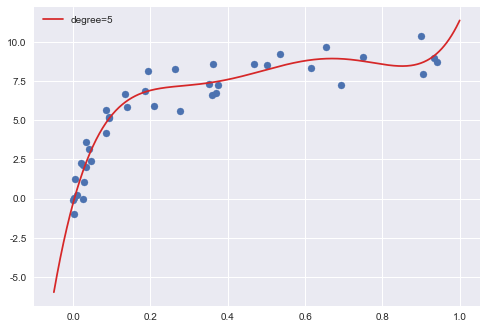

In [48]:
poly = np.polyfit(x.reshape(-1), y, deg=5)

#測試資料集
x_test = np.linspace(-0.05,1,500)[:,None]
y_test=np.polyval(poly, x_test)
plt.scatter(x,y)
plt.plot(x_test.ravel(),y_test,label='degree={}'.format(5), color="#d62728")
plt.legend(loc='best')

#### 使用 Sklearn SGDRegressor
Sklearn 提供了 SGDRegressor 並實現了隨機梯度下降學習。你可能會問梯度下降與隨機梯度下降兩者差別在哪？簡單來說一般的梯度下降法是一次用全部訓練集的數據計算損失函數的梯度，然後做一次參數的更新修正。而隨機梯度下降法就是一次跑一個樣本或是小批次樣本，然後算出一次梯度並更新。而所謂的隨機就是在訓練過程中隨機地抽取樣本，所以才會稱為隨機梯度下降法。

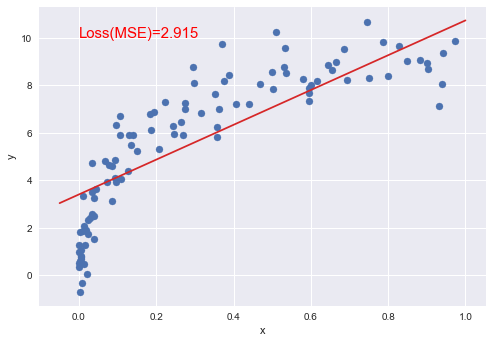

In [49]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# 隨機產生一個特徵的X與輸出y
X, y = make_data(100)

# 建立 SGDRegressor 並設置超參數
regModel = SGDRegressor(max_iter=1000)
# 訓練模型
regModel.fit(X, y)
# 建立測試資料
x_test = np.linspace(-0.05,1,500)[:,None]
# 預測測試集
y_test=regModel.predict(x_test)
# 預測訓練集
y_pred=regModel.predict(X)
# 視覺化預測結果
plt.scatter(X,y)
plt.plot(x_test.ravel(),y_test, color="#d62728")
plt.xlabel('x')
plt.ylabel('y')
plt.text(0, 10, 'Loss(MSE)=%.3f' % mean_squared_error(y_pred, y), fontdict={'size': 15, 'color':  'red'})
plt.show()